# Dense Network

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load extracted high-level features
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-train-features.npz") as npz_file:
    hl_tr_features = npz_file["features"]
    tr_labels = npz_file["labels"]
    
print("train features shape:", hl_tr_features.shape)
print("train labels shape:", tr_labels.shape)

train features shape: (280, 1280)
train labels shape: (280, 6)


In [3]:
# validation features
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-valid-features.npz") as npz_file:
    hl_val_features = npz_file["features"]
    val_labels = npz_file["labels"]
    
print("validation features shape:", hl_val_features.shape)
print("validation labels shape:", val_labels.shape)

validation features shape: (139, 1280)
validation labels shape: (139, 6)


In [4]:
# test features
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-test-features.npz") as npz_file:
    hl_te_features = npz_file["features"]
    te_labels = npz_file["labels"]

print("test features shape:", hl_te_features.shape)
print("test labels shape:", te_labels.shape)

test features shape: (50, 1280)
test labels shape: (50, 6)


## 1-layer dense neural net
This network has no hidden layer, i.e. just the input and the output layer

In [5]:
# create the model
model = keras.Sequential()

# add the one layer
model.add(keras.layers.Dense(units = 6, # 6 output units for each of the classes
                            activation = "softmax", # transforms outputs into probabilities
                            input_dim = 1*1280 # dimensions of input
                            ))

# get summary of created model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


In [6]:
# define loss function and training operation
model.compile(optimizer = "sgd", # stochastic gradient descent optimizer
             loss = "categorical_crossentropy", # labels are already one-hot-encoded, so no need for sparse
             metrics = ["acc"] # track accuracy
             )

Our input shape is already flattened, i.e. 2-dimensional, so we don't need to reshape it now.

As we also won't be standardizing the data because we are dealing with images, we can train the model now.

In [7]:
# fit the model
history1 = model.fit(x = hl_tr_features, y = tr_labels, # features and labels
                    batch_size = 32, # 32 images per batch
                    epochs = 50, # train the whole data set 50 times
                    validation_data = (hl_val_features, val_labels) # specify validation data
                    )

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 1s 2ms/step - loss: 1.6134 - acc: 0.4714 - val_loss: 1.1459 - val_acc: 0.6691
Epoch 2/50
280/280 [==============================] - 0s 186us/step - loss: 0.9700 - acc: 0.7286 - val_loss: 0.8406 - val_acc: 0.7554
Epoch 3/50
280/280 [==============================] - 0s 197us/step - loss: 0.7205 - acc: 0.8036 - val_loss: 0.6720 - val_acc: 0.8058
Epoch 4/50
280/280 [==============================] - 0s 190us/step - loss: 0.5793 - acc: 0.8536 - val_loss: 0.5789 - val_acc: 0.8129
Epoch 5/50
280/280 [==============================] - 0s 144us/step - loss: 0.4871 - acc: 0.8821 - val_loss: 0.5180 - val_acc: 0.8489
Epoch 6/50
280/280 [==============================] - 0s 150us/step - loss: 0.4210 - acc: 0.8964 - val_loss: 0.4823 - val_acc: 0.8489
Epoch 7/50
280/280 [==============================] - 0s 197us/step - loss: 0.3779 - acc: 0.9143 - val_loss: 0.4442 - val_acc: 0.8705
Epoch 8/50
280/280

In [8]:
# access results via
history1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

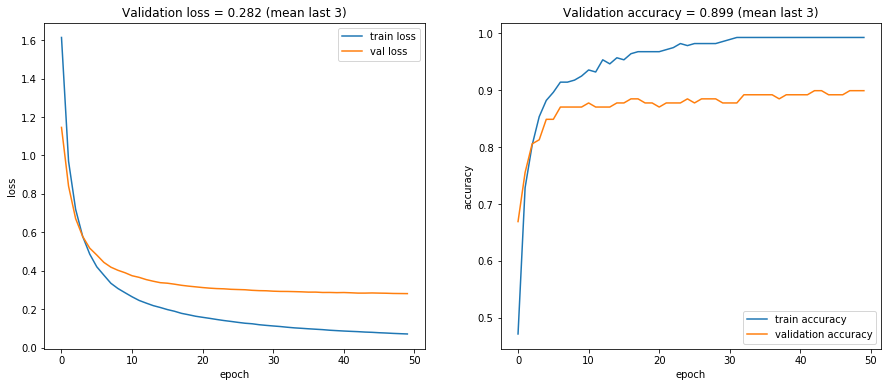

In [9]:
# visualize the results
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

# first plot: comparison of losses
ax1.plot(history1.history["loss"], label = "train loss")
ax1.plot(history1.history["val_loss"], label = "val loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()
ax1.set_title("Validation loss = {:.3f} (mean last 3)".format(np.mean(
    history1.history["val_loss"][-3:])))

ax2.plot(history1.history["acc"], label = "train accuracy")
ax2.plot(history1.history["val_acc"], label = "validation accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
ax2.set_title("Validation accuracy = {:.3f} (mean last 3)".format(np.mean(
    history1.history["val_acc"][-3:])))

plt.show()

The validation accuracy seems to start plateauing after roughly 8 epochs, and then starts overfitting. The validation accuracy seems to be around 90%, let's get the exact test accuracy

In [10]:
(test_loss1, test_accuracy1) = model.evaluate(x = hl_te_features, y = te_labels)

print("test accuracy1:", test_accuracy1)

50/50 [==============================] - 0s 144us/step
test accuracy1: 0.9600000023841858


Here again, we can reach a test accuracy of 96%, which allows the simple 1-layer neural net join the group of all other top performing models.
___
## 2-layer dense model
Let's see whether having a 2-layer dense model increases performance

In [11]:
# first, clear keras backend
from tensorflow.keras import backend as K

K.clear_session()

In [12]:
# create model
model2 = keras.Sequential()

# add first layer
model2.add(keras.layers.Dense(units = 12, # 12 output units, chosen arbitrarily as 2x classes
                             activation = "relu", # non-linear ReLU activation for first layer
                             input_dim = 1*1280))

# add second layer
model2.add(keras.layers.Dense(units = 6, # 6 classes
                             activation = "softmax", # transform output from first layer into probabilities
                             ))

# get summary of model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                15372     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
Total params: 15,450
Trainable params: 15,450
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
model2.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["acc"])

# fit the model
history2 = model2.fit(x = hl_tr_features, y = tr_labels, batch_size = 32, epochs = 50,
          validation_data = (hl_val_features, val_labels))

# inspect keys of results dict
history2.history.keys()

Train on 280 samples, validate on 139 samples
Epoch 1/50
280/280 [==============================] - 1s 3ms/step - loss: 1.5251 - acc: 0.4607 - val_loss: 1.3538 - val_acc: 0.5540
Epoch 2/50
280/280 [==============================] - 0s 198us/step - loss: 1.1975 - acc: 0.6321 - val_loss: 1.0786 - val_acc: 0.7122
Epoch 3/50
280/280 [==============================] - 0s 217us/step - loss: 0.9575 - acc: 0.7464 - val_loss: 0.8892 - val_acc: 0.8058
Epoch 4/50
280/280 [==============================] - 0s 207us/step - loss: 0.7810 - acc: 0.7964 - val_loss: 0.7708 - val_acc: 0.8417
Epoch 5/50
280/280 [==============================] - 0s 227us/step - loss: 0.6607 - acc: 0.8321 - val_loss: 0.6730 - val_acc: 0.8633
Epoch 6/50
280/280 [==============================] - 0s 148us/step - loss: 0.5665 - acc: 0.8643 - val_loss: 0.6062 - val_acc: 0.8777
Epoch 7/50
280/280 [==============================] - 0s 200us/step - loss: 0.4890 - acc: 0.8679 - val_loss: 0.5495 - val_acc: 0.8705
Epoch 8/50
280/280

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

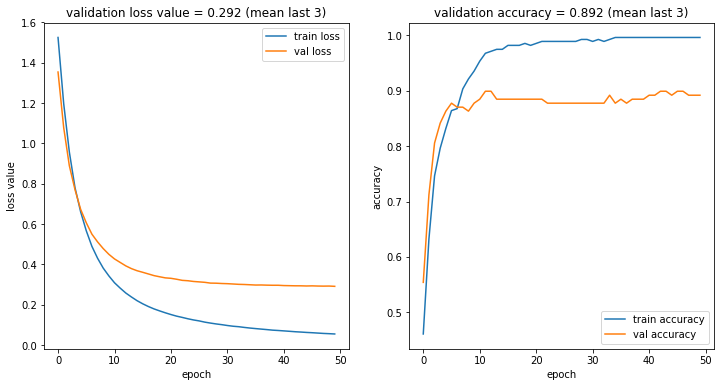

In [14]:
# plot results
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# losses comparison
ax1.plot(history2.history["loss"], label = "train loss")
ax1.plot(history2.history["val_loss"], label = "val loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()
ax1.set_title("validation loss value = {:.3f} (mean last 3)".format(
    np.mean(history2.history["val_loss"][-3:])))

# accuracy comparison
ax2.plot(history2.history["acc"], label = "train accuracy")
ax2.plot(history2.history["val_acc"], label = "val accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
ax2.set_title("validation accuracy = {:.3f} (mean last 3)".format(np.mean(
    history2.history["val_acc"][-3:])))

plt.show()

In this model, we can reduce the loss value even more, but we still encounter the problem of overfitting after reaching a validation accuracy plateau after ~8 epochs. 

Let's see whether we can achieve the test value of 96% again.

In [15]:
# evaluate on test set
(test_loss2, test_accuracy2) = model2.evaluate(hl_te_features, te_labels)

print("test accuracy2:", test_accuracy2)

50/50 [==============================] - 0s 187us/step
test accuracy2: 0.9399999928474426


What we can see here is probably an effect of stronger overfitting and thus worse generalization. A model with more layers can overfit more easily and thus generalize worse on unseen test data. We can see in the accuracy plot that the validation curve has more variance than in the 1-layer model, which might be a reason why we lack around 4 percentage points in accurarcy. The model is trained too much to expect the same kind of data from the training set, and hence performs poorly on other data.

To counteract overfitting, we'd need to include dropout layers or regularization in our model. This will be done in the convolutional model, where we train on the image pixels.
___
### Important to note
It is important to keep in mind that the performance of these extremely simple models is only this good because we extracted high-level features from a highly complex, pre-trained model, which exctraced and served us all the important features in numerical form. As a consequence, simple 1-layer models can learn from these numerical values very well and thus reach accuracy on real-life image recognition in the high 90% ranges. This wouldn't be possible otherwise, as we will quickly see when we train our own CNN model on these images.

In [16]:
import pandas as pd

# save test accuracy of both models
save_df = pd.DataFrame({
    "model": ["1-layer-cnn", "2-layer-cnn"],
    "test_accuracy": [test_accuracy1, test_accuracy2]
})

save_df.to_csv("/Users/Ingo/Python Files/Course-project4/06_dense-nn.csv",
              index = False)